In [82]:
import pandas as pd # data_Analysis & proccesing 
import numpy as np  # linear algebraic operation 
import matplotlib.pyplot as plt # visualization the analyise_data 

In [83]:
dataset_train=pd.read_csv("Google_Stock_Price_Train.csv",index_col=0)
dataset_test=pd.read_csv("Google_Stock_Price_Test.csv",index_col=0)

In [84]:
dataset_train

,Open,High,Low,Close,Volume
Date,,,,,
1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...
12/23/2016,790.90,792.74,787.28,789.91,"623,400"
12/27/2016,790.68,797.86,787.66,791.55,"789,100"
12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"


In [85]:
training_set = dataset_train[["Open"]]

In [86]:
# .iloc[] is an indexer used for integer-location-based indexing of data in a DataFrame.
training_set = dataset_train.iloc[:,1:2].values


In [87]:
training_set

array([[332.83],
       [333.87],
       [330.75],
       ...,
       [794.23],
       [785.93],
       [782.78]])

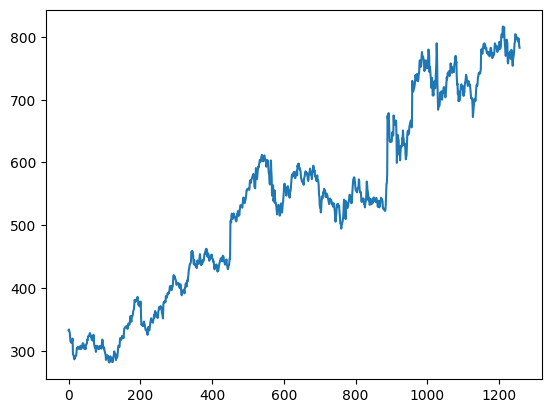

In [88]:
plt.plot(training_set)

In [89]:
type(training_set)

numpy.ndarray

In [90]:
real_stock_price=dataset_test[["Open"]]

<Axes: xlabel='Date'>

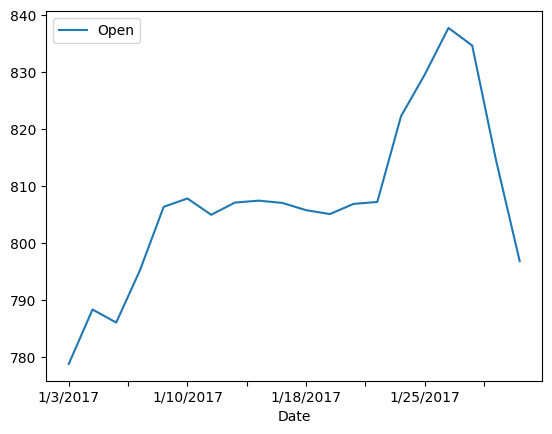

In [91]:
real_stock_price.plot()

In [92]:
type(training_set)

numpy.ndarray

In [93]:
training_set.shape

(1258, 1)

In [94]:
len(training_set)

1258

In [95]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled =sc.fit_transform(training_set )

In [96]:
training_set_scaled   # 2D array 

array([[0.09640129],
       [0.09834351],
       [0.09251685],
       ...,
       [0.95807422],
       [0.94257381],
       [0.93669113]])

In [97]:
len(training_set_scaled)

1258

In [98]:
X_train =[]
y_train=[]

In [99]:
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [100]:
X_train.shape 

(1198, 60)

In [101]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [102]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [103]:
model = Sequential()

In [104]:
model.add(LSTM(units=60,return_sequences =True, input_shape=(X_train.shape[1],1)))

C:\Users\DHRUV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [105]:
model.get_layer

<bound method Model.get_layer of <Sequential name=sequential_1, built=True>>

In [106]:
model.layers

[<LSTM name=lstm_3, built=True>]

In [107]:
model.add(LSTM(units=60,return_sequences=True))

In [108]:
model.add(LSTM(units=60))

In [109]:
model.add(Dense(units = 1))

In [110]:
model.layers

[<LSTM name=lstm_3, built=True>,
 <LSTM name=lstm_4, built=True>,
 <LSTM name=lstm_5, built=True>,
 <Dense name=dense_1, built=True>]

In [111]:
model.get_config()

{'name': 'sequential_1',
 'trainable': True,
 'dtype': 'float32',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 60, 1),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_1'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'LSTM',
   'config': {'name': 'lstm_3',
    'trainable': True,
    'dtype': 'float32',
    'return_sequences': True,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'zero_output_for_mask': False,
    'units': 60,
    'activation': 'tanh',
    'recurrent_activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'recurrent_initializer': {'module': 'keras.initializers',
     'class_name': 'OrthogonalInitializer',
     'config': {'gain': 1.0, 'seed': None},
     'reg

In [112]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [113]:
model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 119ms/step - loss: 0.0770
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - loss: 0.0030
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - loss: 0.0014
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step - loss: 0.0016
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - loss: 0.0018
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - loss: 0.0014
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - loss: 0.0014
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - loss: 0.0014
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - loss: 0.0012
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 0.0013
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step - loss: 0.0013
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - loss: 0.0012
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 0.0010
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0012
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━

In [114]:
model.get_weights

<bound method Layer.get_weights of <Sequential name=sequential_1, built=True>>

In [115]:
test_set = pd.read_csv("Google_Stock_Price_Test.csv")

In [116]:

real_stock_price = test_set.iloc[:,1:2].values


In [117]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
dataset_total

Date
1/3/2012     325.25
1/4/2012     331.27
1/5/2012     329.83
1/6/2012     328.34
1/9/2012     322.04
              ...  
1/25/2017    829.62
1/26/2017    837.81
1/27/2017    834.71
1/30/2017    814.66
1/31/2017    796.86
Name: Open, Length: 1278, dtype: float64

In [118]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [119]:
inputs=inputs.reshape(-1,1)

In [120]:
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [121]:
inputs=sc.transform(inputs)
inputs.shape 

(80, 1)

In [122]:
x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])

In [123]:
x_test = np.array(x_test)
x_test.shape

(20, 60)

In [124]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(20, 60, 1)

In [125]:

predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


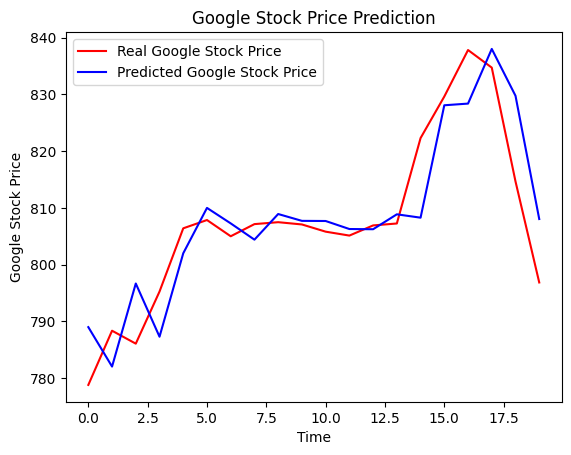

In [126]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
